# SVM (Support Vector Machine)
- 훈련과정 동안 SVM 모델은 데이터 포인트를 여러 범주로 나누는 의사 결정 경계를 만드는 것을 목표로 함

In [2]:
from mylibrary import *
diabetes_dataset_file = './diabetes.csv'
df_diabetes = pd.read_csv(diabetes_dataset_file)
df_diabetes_target = df_diabetes.loc[:, ['Outcome']]
df_diabetes_features = df_diabetes.drop(['Outcome'], axis=1)

In [3]:
#feature normalize
from sklearn.preprocessing import MinMaxScaler
diabetes_scaler = MinMaxScaler()
diabetes_scaler.fit(df_diabetes_features)
nd_diabetes_features = diabetes_scaler.transform(df_diabetes_features)
df_diabetes_features_normalized = pd.DataFrame(data=nd_diabetes_features,
                                              columns=df_diabetes_features.columns)

In [4]:
#75:25 비율로 train, test data 분리
diabetes_split = train_test_split(df_diabetes_features_normalized, df_diabetes_target,
                                 test_size=0.25, random_state=17)
df_diabetes_features_train = diabetes_split[0]
df_diabetes_features_test = diabetes_split[1]
df_diabetes_target_train = diabetes_split[2]
df_diabetes_target_test = diabetes_split[3]

In [7]:
#svm 분류기 생성
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(df_diabetes_features_train, df_diabetes_target_train)

#test dataset 에 svc 모델로 예측
predicted_diabetes = svc_model.predict(df_diabetes_features_test)
print(predicted_diabetes)

[0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 1 0 1]


/Users/rbk/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [8]:
#2진 feature를 갖는 임의의 이진 분류 데이터셋 생성
from sklearn.datasets import make_classification
Synthetic_BinaryClassX, Synthetic_BinaryClassY = make_classification(n_samples=50, n_features=2, n_redundant=0,
                                                                    n_classes=2)

#-3 ~ 3 스케일 조정
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3, 3))
scaler.fit(Synthetic_BinaryClassX.reshape(-1, 1))
Synthetic_BinaryClassX = scaler.transform(Synthetic_BinaryClassX)

In [9]:
#SVC 생성
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear', C=1, gamma='auto')
svc_model_polynomial2 = SVC(kernel='poly', degree=2, C=1, gamma='auto')
svc_model_polynomial15 = SVC(kernel='poly', degree=15, C=1, gamma='auto')
svc_model_rbf = SVC(kernel='rbf', C=1, gamma='auto')

svc_model_linear.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_polynomial2.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_polynomial15.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)
svc_model_rbf.fit(Synthetic_BinaryClassX, Synthetic_BinaryClassY)

SVC(C=1, gamma='auto')

In [13]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

X0 = Synthetic_BinaryClassX[:, 0]
X1 = Synthetic_BinaryClassX[:, 1]
xx, yy = make_meshgrid(X0, X1, 0.02)

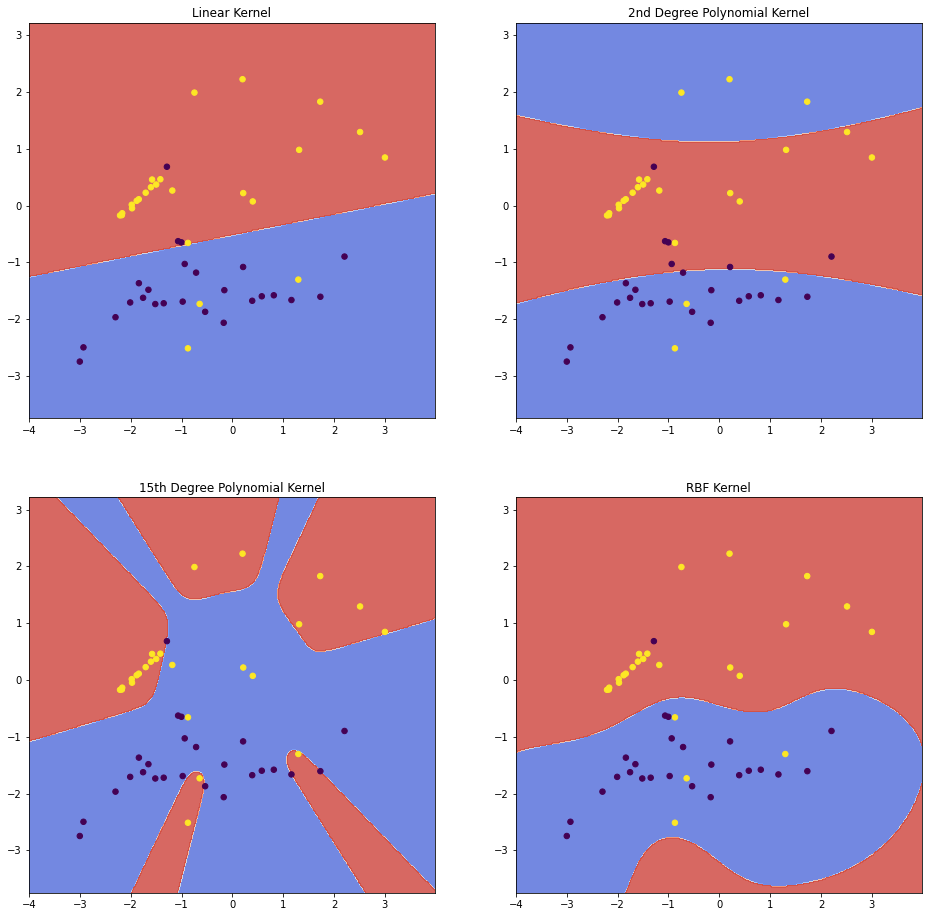

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

#linear
plot_contours(axes[0, 0], svc_model_linear, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
axes[0, 0].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[0, 0].set_xlim(xx.min(), xx.max())
axes[0, 0].set_ylim(yy.min(), yy.max())
axes[0, 0].set_title('Linear Kernel')

#poly2
plot_contours(axes[0, 1], svc_model_polynomial2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
axes[0, 1].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[0, 1].set_xlim(xx.min(), xx.max())
axes[0, 1].set_ylim(yy.min(), yy.max())
axes[0, 1].set_title('2nd Degree Polynomial Kernel')

#poly15
plot_contours(axes[1, 0], svc_model_polynomial15, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
axes[1, 0].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[1, 0].set_xlim(xx.min(), xx.max())
axes[1, 0].set_ylim(yy.min(), yy.max())
axes[1, 0].set_title('15th Degree Polynomial Kernel')

#rbf
plot_contours(axes[1, 1], svc_model_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
axes[1, 1].scatter(X0, X1, s=30, c=Synthetic_BinaryClassY)
axes[1, 1].set_xlim(xx.min(), xx.max())
axes[1, 1].set_ylim(yy.min(), yy.max())
axes[1, 1].set_title('RBF Kernel')

plt.show()

# SVR (Support Vector Regression)

- svm 모델을 선형회귀에 적용한 경우
- 데이터 포인트를 구분하는 의사 결정 경계를 찾는 작업이 아닌 훈련 데이터에 가장 적절한 직선을 찾는 작업을 수행하게 됨

In [16]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df_boston_features = pd.DataFrame(data = boston_dataset.data,
                                  columns = boston_dataset.feature_names)
df_boston_target = pd.DataFrame(data = boston_dataset.target, columns=['price'])

boston_split = train_test_split(df_boston_features, df_boston_target,
                               test_size=0.25, random_state=17)
df_boston_features_train = boston_split[0]
df_boston_features_test = boston_split[1]
df_boston_target_train = boston_split[2]
df_boston_target_test = boston_split[3]

In [17]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.5, gamma='auto', epsilon=1.5)
svr_model.fit(df_boston_features_train, df_boston_target_train.values.ravel())

SVR(C=1.5, epsilon=1.5, gamma='auto', kernel='linear')

In [18]:
#svr model test dataset prediction
svr_predicted_prices = svr_model.predict(df_boston_features_test)

Text(0.5, 1.0, 'expected vs predicted')

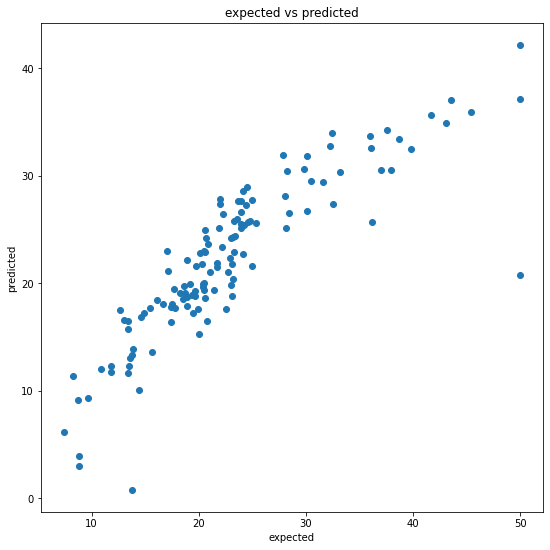

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_boston_target_test, svr_predicted_prices)
plt.xlabel('expected')
plt.ylabel('predicted')
plt.title('expected vs predicted')